<a href="https://colab.research.google.com/github/Astrid-Lubang/FINALS_ELECTIVES_DATASET/blob/main/FINALS_ELECTIVES_DATASET/PART%202/ADDING_TEXT_TO_IMAGE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **REVISED TOPIC: IDENTIFYING DOG BREEDS BY OVERLAYING BREED NAMES ON THEIR IMAGES**

---



CLONING THE REPOSITORY FILE






In [109]:
!git clone https://github.com/Astrid-Lubang/FINALS_ELECTIVES_DATASET.git
%cd FINALS_ELECTIVES_DATASET/
from IPython.display import clear_output
clear_output()

INSTALL AND IMPORT NEEDED LIBRARIES

In [ ]:
!pip install opencv-python-headless matplotlib
!pip install opencv-python
!pip install matplotlib



In [ ]:
import cv2
import os
import matplotlib.pyplot as plt
from matplotlib import patches
import numpy as np
from tensorflow.keras.preprocessing import image


IMAGE PREPROCESSING

In [ ]:
# List files in the directory where the image is supposed to be
os.listdir('FINALS_ELECTIVES_DATASET/DOG_BREED')


['DACHSHUND',
 'YORKSHIRE_TERRIER',
 'BOXER',
 'BEAGLE',
 'POODLE',
 'GERMAN_SHEPHERD',
 'BULLDOG',
 'ROTTWEILER',
 'LABRADOR_RETRIEVER',
 'GOLDEN_RETRIEVER']

DISPLAYING DOG IMAGES WITH BREED NAME OVERLAY



In [ ]:
# Define the path to the dog breeds folder
dog_breed_folder = "FINALS_ELECTIVES_DATASET/DOG_BREED/"

# Loop through the images in the folder
for image_name in os.listdir(dog_breed_folder):
    if image_name.endswith('.jpg'):  # or any other image format
        image_path = os.path.join(dog_breed_folder, image_name)
        image = cv2.imread(image_path)
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Define the breed name (you can modify this depending on the filename or external info)
        breed_name = image_name.split('_')[0]  # Assuming breed name is part of the filename

        # Display the image with overlayed text
        fig, ax = plt.subplots()
        ax.imshow(image_rgb)
        ax.axis('off')
        plt.text(10, 30, breed_name, fontsize=15, color='white', backgroundcolor='black')
        plt.show()


MODEL TRAINING WITH MOBILENETV2

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

# Load MobileNetV2 with pre-trained weights, excluding the top layer
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Build the new model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),  # Global average pooling instead of Flatten
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # Replace 10 with the number of breeds
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Prepare the image data generator for training
train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

# Path to your training data directory
train_generator = train_datagen.flow_from_directory(
    'FINALS_ELECTIVES_DATASET/DOG_BREED',  # Correct path
    target_size=(224, 224),
    batch_size=32,  # Adjust batch size for faster training
    class_mode='categorical'
)

# Train the model
model.fit(train_generator, epochs=5)  # Use fewer epochs for quick training


Found 951 images belonging to 10 classes.
Epoch 1/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.6012 - loss: 1.2969
Epoch 2/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.9895 - loss: 0.0637
Epoch 3/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 1.0000 - loss: 0.0163
Epoch 4/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 1.0000 - loss: 0.0096
Epoch 5/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 1.0000 - loss: 0.0064


In [112]:
# Save the trained model
model.save('dog_breed_classifier.h5')


BREED PREDICTION

In [113]:

def predict_breed(model, img_path, class_indices):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Make a prediction
    predictions = model.predict(img_array)
    breed_index = np.argmax(predictions)
    breed_name = list(class_indices.keys())[list(class_indices.values()).index(breed_index)]

    return breed_name, predictions[0]


In [115]:
class_indices = train_generator.class_indices


VISUALIZATION FOR DOG IMAGES

In [123]:
def display_prediction(img_path, breed_name, text_x=10, text_y=30):
    """
    Display the image with the breed name as the title, allowing for text positioning.

    Parameters:
    - img_path: Path to the image file.
    - breed_name: Predicted breed name.
    - text_x: x-coordinate for text position (default is 10).
    - text_y: y-coordinate for text position (default is 30).
    """
    # Replace underscores with spaces in the breed name
    breed_name = breed_name.replace('_', ' ')

    # Load and display the image
    img = image.load_img(img_path, target_size=(224, 224))
    plt.imshow(img)
    plt.axis('off')

    # Adjust the text position
    plt.text(
        text_x, text_y, breed_name,
        fontsize=15, color='white', backgroundcolor='black'
    )
    plt.show()


PREDICITING AND DISPLAYING DOG BREED IMAGE

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


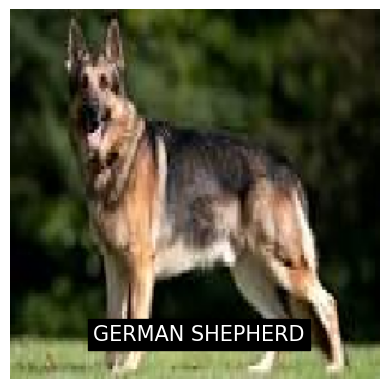

In [125]:
# Example image path
img_path = '/content/FINALS_ELECTIVES_DATASET/DOG_BREED/GERMAN_SHEPHERD/German Shepherd_50.jpg'

if os.path.exists(img_path):
    # Predict the breed
    breed_name, probabilities = predict_breed(model, img_path, class_indices)

    # Display prediction with custom text position
    display_prediction(img_path, breed_name, text_x=50, text_y=200)
else:
    print(f"Error: The file {img_path} does not exist.")
